In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from IPython.display import Image  # 주피터 노트북에 이미지 삽입

In [ ]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
distribution_centers = pd.read_csv('data/distribution_centers.csv')
events = pd.read_csv('data/events.csv')
inventory_items = pd.read_csv('data/inventory_items.csv')
order_items = pd.read_csv('data/order_items.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
users = pd.read_csv('data/users.csv')

### 데이터 확인

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      125226 non-null  int64 
 1   user_id       125226 non-null  int64 
 2   status        125226 non-null  object
 3   gender        125226 non-null  object
 4   created_at    125226 non-null  object
 5   returned_at   12530 non-null   object
 6   shipped_at    81461 non-null   object
 7   delivered_at  43884 non-null   object
 8   num_of_item   125226 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [ ]:
inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_center_id  490705 non-null  int64  
dtypes: float64(2), i

In [ ]:
#for 문을 이용해서 _at이 붙은 변수들을 datetime 형식으로 변경
datetime_columns = ['created_at','returned_at','delivered_at','shipped_at']

for column in datetime_columns:
    orders[column] = pd.to_datetime(orders[column], errors = 'coerce')

orders.dropna(subset = datetime_columns, how = 'all', inplace = True)

In [ ]:
orders.isna().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     109938
shipped_at       42709
delivered_at     79349
num_of_item          0
dtype: int64

In [ ]:
#for 문을 이용해서 _at이 붙은 변수들을 datetime 형식으로 변경
datetime_columns = ['created_at','returned_at','delivered_at','shipped_at']

for column in datetime_columns:
    order_items[column] = pd.to_datetime(order_items[column], errors = 'coerce')

order_items.dropna(subset = datetime_columns, how = 'all', inplace = True)

In [ ]:
order_items.dtypes

id                                 int64
order_id                           int64
user_id                            int64
product_id                         int64
inventory_item_id                  int64
status                            object
created_at           datetime64[ns, UTC]
shipped_at           datetime64[ns, UTC]
delivered_at         datetime64[ns, UTC]
returned_at          datetime64[ns, UTC]
sale_price                       float64
dtype: object

#### Table join 해보기

In [ ]:
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaT,NaT,NaT,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaT,NaT,NaT,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaT,NaT,NaT,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaT,NaT,NaT,2


In [ ]:
orders_merged = pd.merge(order_items, orders, left_on = 'order_id'
                         , right_on = 'order_id', how = 'inner', suffixes = ('_item', '_order'))

'''
select *
from order_items A
join orders B
on A.order_id = B.order_id

'''

'\nselect *\nfrom order_items A\njoin orders B\non A.order_id = B.order_id\n\n'

In [ ]:
orders_merged = pd.merge(orders_merged, products, left_on = 'product_id'
                         , right_on = 'id', how = 'inner', suffixes = ('_order_product', '_product'))

In [ ]:
orders_merged.shape

(177354, 28)

In [ ]:
orders_merged = pd.merge(orders_merged, inventory_items, left_on = 'inventory_item_id'
                         , right_on = 'id', how = 'left', suffixes = ('_all', '_inventory'))

'''
select *
from orders_merged A
left join inventory_items B
on A.order_id = B.order_id

'''

'\nselect *\nfrom orders_merged A\nleft join inventory_items B\non A.order_id = B.order_id\n\n'

In [ ]:
orders_merged.shape

(177354, 40)

In [ ]:
orders_final = pd.merge(orders_merged, users, left_on = 'user_id_item'
                         , right_on = 'id', how = 'left', suffixes = ('_orders', '_user'))

In [ ]:
orders_final.shape

(177354, 55)

In [ ]:
orders_final.head()

,id_order_product,order_id,user_id_item,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,user_id_order,status_order,gender_orders,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,id_product,cost_all,category,name,brand,retail_price,department,sku,distribution_center_id,id_orders,product_id_inventory,created_at_orders,sold_at,cost_inventory,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,id_user,first_name,last_name,email,age,gender_user,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,83582,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,410368,14235,2021-09-09 06:17:00+00:00,NaN,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,83582,Kathryn,Ortega,kathrynortega@example.net,29,F,Hebei,3863 Johnson Brooks Suite 474,74199,Jinhua,China,39.388173,115.731465,Search,2021-11-27 07:33:00+00:00
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,22551,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,110590,14235,2023-06-05 15:24:00+00:00,NaN,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,22551,Terri,Alvarez,terrialvarez@example.net,35,F,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,28215,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,138236,14235,2020-04-12 14:36:00+00:00,NaN,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,28215,Rebecca,Mcgee,rebeccamcgee@example.org,49,F,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,20165,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,99072,14235,2020-01-24 05:47:00+00:00,NaN,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,20165,Shelly,Rogers,shellyrogers@example.net,44,F,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,71954,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,353798,14235,2022-09-13 16:58:00+00:00,NaN,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,71954,Mariah,Stephens,mariahstephens@example.com,59,F,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00


In [ ]:
#중복 열을 찾고 제거하는 과정
duplicate_columns = []

# 모든 열 쌍을 비교하는 반복문
for i in range(len(orders_final.columns)):
    for j in range(i+1, len(orders_final.columns)):
        col1 = orders_final.columns[i]
        col2 = orders_final.columns[j]
        if orders_final[col1].equals(orders_final[col2]):
            duplicate_columns.append(col2)



In [ ]:
duplicate_columns

['user_id_order',
 'id_user',
 'id_product',
 'product_id_inventory',
 'id_orders',
 'status_order',
 'shipped_at_order',
 'delivered_at_order',
 'returned_at_order',
 'retail_price',
 'product_retail_price',
 'id_user',
 'gender_user',
 'product_id_inventory',
 'cost_inventory',
 'product_category',
 'product_name',
 'product_brand',
 'product_retail_price',
 'product_department',
 'product_sku',
 'product_distribution_center_id']

In [ ]:
orders_final = orders_final.drop(columns= duplicate_columns)

In [ ]:
orders_final.shape

(177354, 36)

In [ ]:
orders_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177354 entries, 0 to 177353
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   id_order_product        177354 non-null  int64              
 1   order_id                177354 non-null  int64              
 2   user_id_item            177354 non-null  int64              
 3   product_id_all          177354 non-null  int64              
 4   inventory_item_id       177354 non-null  int64              
 5   status_item             177354 non-null  object             
 6   created_at_item         177354 non-null  datetime64[ns, UTC]
 7   shipped_at_item         115410 non-null  datetime64[ns, UTC]
 8   delivered_at_item       62286 non-null   datetime64[ns, UTC]
 9   returned_at_item        17784 non-null   datetime64[ns, UTC]
 10  sale_price              177354 non-null  float64            
 11  gender_orders           17

In [ ]:
orders_final.drop('sold_at', axis = 1, inplace = True) #모두 null인 값

In [ ]:
orders_final['status_item'].value_counts()

status_item
Shipped       53124
Complete      44502
Processing    35480
Cancelled     26464
Returned      17784
Name: count, dtype: int64

In [ ]:
orders_final.columns

Index(['id_order_product', 'order_id', 'user_id_item', 'product_id_all',
       'inventory_item_id', 'status_item', 'created_at_item',
       'shipped_at_item', 'delivered_at_item', 'returned_at_item',
       'sale_price', 'gender_orders', 'created_at_order', 'num_of_item',
       'cost_all', 'category', 'name', 'brand', 'department', 'sku',
       'distribution_center_id', 'created_at_orders', 'first_name',
       'last_name', 'email', 'age', 'state', 'street_address', 'postal_code',
       'city', 'country', 'latitude', 'longitude', 'traffic_source',
       'created_at_user'],
      dtype='object')

In [ ]:
cancelled_orders = orders_final[orders_final['status_item'] == 'Cancelled'].copy()
returned_orders = orders_final[orders_final['status_item'] == 'Returned'].copy()
complete_orders = orders_final[orders_final['status_item'].isin(['Complete', 'Shipped'])].copy()

#### 완료된 주문

In [ ]:
top_selling_products = complete_orders.groupby(['product_id_all', 'name'])['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False)

In [ ]:
complete_orders.groupby(['brand', 'category'])['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False)

,brand,category,num_of_item
4681,Speedo,Swim,1153
67,7 For All Mankind,Jeans,1027
3505,Motherhood Maternity,Maternity,1007
236,Allegra K,Blazers & Jackets,977
5523,Wrangler,Jeans,902
...,...,...,...
4696,Splendid,Maternity,1
4707,Sports Katz,Active,1
3321,Mara Hoffman,Sweaters,1
1799,Faconnable,Pants,1


In [ ]:
complete_orders['product_cost'] = complete_orders['cost_all'] * complete_orders['num_of_item']
complete_orders['total_revenue'] = complete_orders['sale_price'] * complete_orders['num_of_item']
complete_orders['profit'] = complete_orders['total_revenue'] - complete_orders['product_cost']

In [ ]:
#어떤 브랜드가 어떤 성별에게 많이 팔렸나?
# 성별 별로 차이가 있나?
# 성별 별로 비용, 매출, 이익을 요약하는 데이터프레임 생성

complete_orders_summary = complete_orders.groupby(['department', 'category', 'name']).agg(
    quantity = ('num_of_item', 'sum'),
    cost = ('product_cost', 'sum'),
    revenue = ('total_revenue', 'sum'),
    profit = ('profit', 'sum')

).reset_index().sort_values('revenue', ascending = False)

In [ ]:
complete_orders_summary['profit_per_item'] = complete_orders_summary['profit']/ complete_orders_summary['quantity']

In [ ]:
complete_orders_summary.head()

,department,category,name,quantity,cost,revenue,profit,profit_per_item
1386,Men,Active,The North Face Apex Bionic Soft Shell Jacket -...,20,7838.040040,18060.0,10221.959960,511.097998
4141,Men,Outerwear & Coats,The North Face Apex Bionic Mens Soft Shell Ski...,20,8397.900031,18060.0,9662.099969,483.104998
4218,Men,Outerwear & Coats,Woolrich Arctic Parka DF,17,8128.890047,16830.0,8701.109953,511.829997
2321,Men,Fashion Hoodies & Sweatshirts,The North Face Apex Bionic Soft Shell Jacket -...,15,7869.645003,13545.0,5675.354997,378.357000
17658,Women,Intimates,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,12,6144.011998,10836.0,4691.988002,390.999000


#### 카테고리별

In [ ]:
category_summary = complete_orders_summary.groupby('category').agg({
    'revenue': 'sum',
    'profit': 'sum'

}).reset_index()
category_summary.head()

,category,revenue,profit
0,Accessories,425276.119790,254669.136359
1,Active,481850.740287,280232.391579
2,Blazers & Jackets,301045.040751,187113.154372
3,Clothing Sets,16148.280039,6023.861652
4,Dresses,486562.341166,267304.096548


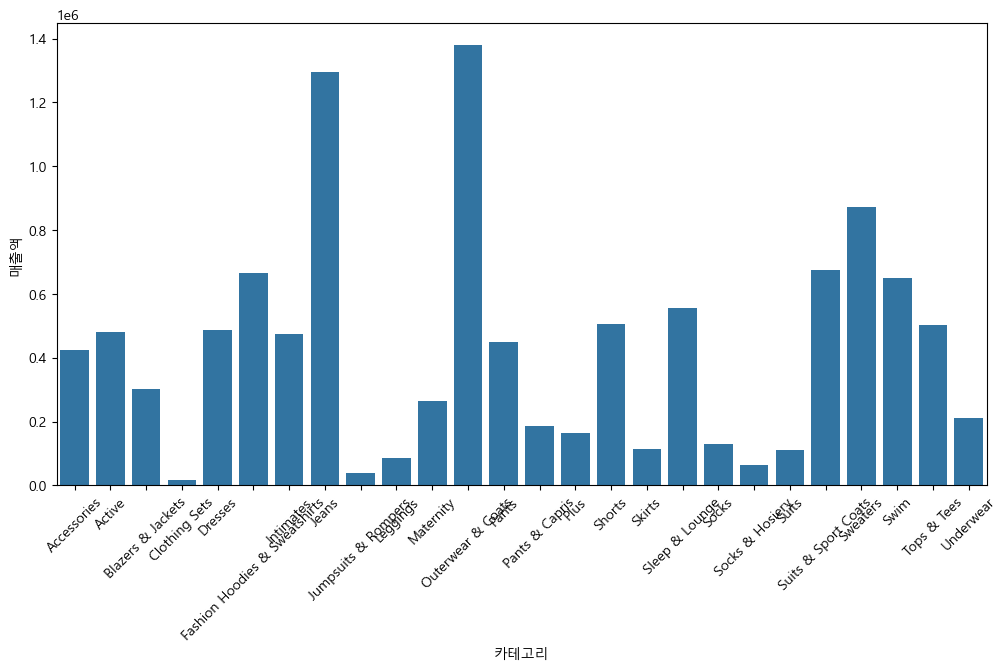

In [ ]:
plt.figure(figsize= (12,6))
sns.barplot(x = 'category', y = 'revenue', data = category_summary)
plt.xlabel('카테고리')
plt.ylabel('매출액')
plt.xticks(rotation = 45)
plt.show()

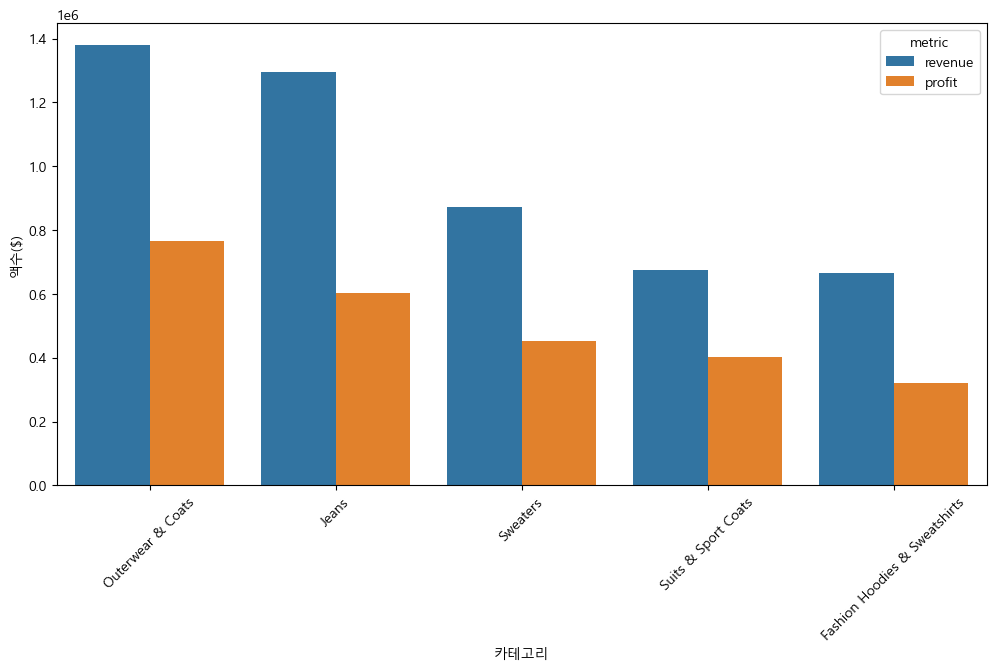

In [ ]:
#매출 기준 상위 5개만 뽑아서 시각화하기
category_summary_top5 = category_summary.sort_values('revenue', ascending = False).head()


#melt 함수를 사용해서 profit과 revenue를 같이 표기하는 시각화 차트 만들기
category_summary_melt = pd.melt(category_summary_top5, id_vars = 'category', value_vars= ['revenue', 'profit'], var_name= 'metric', value_name = 'amount')


plt.figure(figsize= (12,6))
sns.barplot(x = 'category', y = 'amount',hue = 'metric' , data = category_summary_melt)
plt.xlabel('카테고리')
plt.ylabel('액수($)')
plt.xticks(rotation = 45)
plt.show()

#### 성별

In [ ]:
category_summary = complete_orders_summary.groupby('department').agg({
    'revenue': 'sum',
    'profit': 'sum'

}).reset_index()
category_summary.head()

,department,revenue,profit
0,Men,5.898343e+06,3.053947e+06
1,Women,5.206254e+06,2.710367e+06


In [ ]:

men_summary = complete_orders[complete_orders['department'] == 'Men'].groupby(['department', 'category']).agg(
    quantity = ('num_of_item', 'sum'),
    cost = ('product_cost', 'sum'),
    revenue = ('total_revenue', 'sum'),
    profit = ('profit', 'sum')

).reset_index().sort_values('revenue', ascending = False)

In [ ]:
men_summary.head()

,department,category,quantity,cost,revenue,profit
4,Men,Outerwear & Coats,5743,385926.349816,874556.488947,488630.139131
3,Men,Jeans,8025,438602.990878,823461.710564,384858.719686
9,Men,Suits & Sport Coats,5302,271592.306116,674974.079088,403381.772972
10,Men,Sweaters,7070,271526.327086,542533.160645,271006.833558
5,Men,Pants,7488,206108.722215,448873.211071,242764.488856


In [ ]:

women_summary = complete_orders[complete_orders['department'] == 'Women'].groupby(['department', 'category']).agg(
    quantity = ('num_of_item', 'sum'),
    cost = ('product_cost', 'sum'),
    revenue = ('total_revenue', 'sum'),
    profit = ('profit', 'sum')

).reset_index().sort_values('revenue', ascending = False)

In [ ]:
women_summary.head()

,department,category,quantity,cost,revenue,profit
11,Women,Outerwear & Coats,3580,227789.183349,504164.490107,276375.306757
4,Women,Dresses,5720,219258.244618,486562.341166,267304.096548
6,Women,Intimates,13675,251943.254599,473683.580320,221740.325721
7,Women,Jeans,5032,254846.705123,471713.231444,216866.526322
19,Women,Sweaters,4465,147326.269663,328734.349754,181408.080091


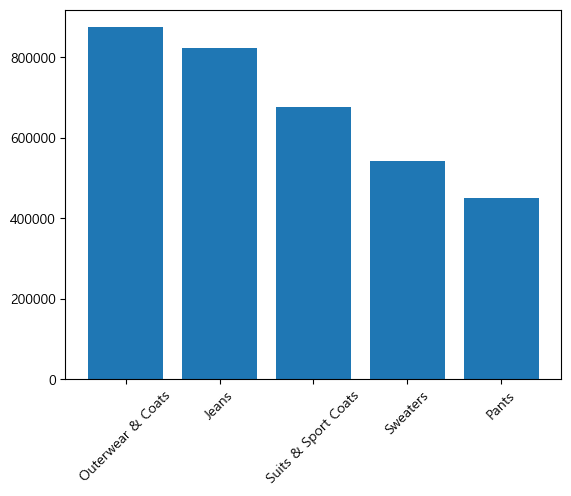

In [ ]:
men_summary_top5 = men_summary.sort_values('revenue', ascending = False).head()

plt.bar(men_summary_top5['category'], men_summary_top5['revenue'])
plt.xticks(rotation = 45)
plt.show()

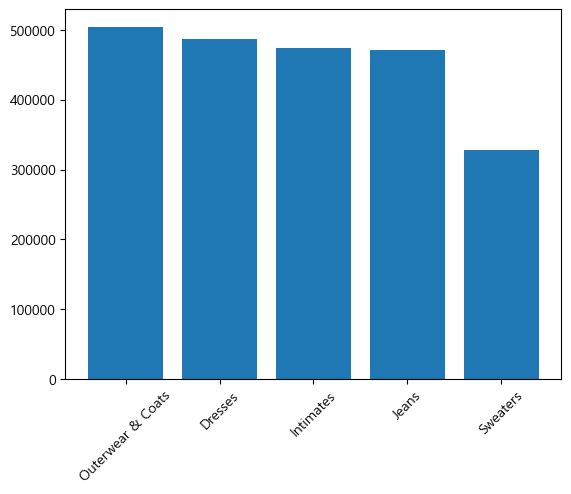

In [ ]:
women_summary_top5 = women_summary.sort_values('revenue', ascending = False).head()

plt.bar(women_summary_top5['category'], women_summary_top5['revenue'])
plt.xticks(rotation = 45)
plt.show()

#### 국가별

In [ ]:
complete_orders.head()

,id_order_product,order_id,user_id_item,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,gender_orders,created_at_order,num_of_item,cost_all,category,name,brand,department,sku,distribution_center_id,created_at_orders,first_name,last_name,email,age,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user,product_cost,total_revenue,profit
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,F,2023-03-14 03:59:00+00:00,1,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2023-06-05 15:24:00+00:00,Terri,Alvarez,terrialvarez@example.net,35,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00,0.0083,0.02,0.0117
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,F,2023-12-03 13:23:00+00:00,4,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-04-12 14:36:00+00:00,Rebecca,Mcgee,rebeccamcgee@example.org,49,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00,0.0332,0.08,0.0468
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,F,2023-12-23 00:17:00+00:00,4,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-01-24 05:47:00+00:00,Shelly,Rogers,shellyrogers@example.net,44,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00,0.0332,0.08,0.0468
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,F,2022-06-17 17:21:00+00:00,3,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-09-13 16:58:00+00:00,Mariah,Stephens,mariahstephens@example.com,59,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00,0.0249,0.06,0.0351
5,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,F,2023-09-15 12:39:00+00:00,2,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-01-06 14:25:00+00:00,Danielle,Bennett,daniellebennett@example.com,46,Maryland,4809 Michael Stream Apt. 104,20879,Montgomery Village,United States,39.170423,-77.175666,Search,2019-08-22 12:39:00+00:00,0.0166,0.04,0.0234


In [ ]:
country_summary = complete_orders.groupby(['country', 'category']).agg(
    quantity = ('num_of_item', 'sum'),
    cost = ('product_cost', 'sum'),
    revenue = ('total_revenue', 'sum'),
    profit = ('profit', 'sum')

).reset_index().sort_values('revenue', ascending = False)

In [ ]:
country_summary

,country,category,quantity,cost,revenue,profit
90,China,Outerwear & Coats,3242,212699.973698,477284.469667,264584.495970
86,China,Jeans,4616,243692.374615,454832.670665,211140.296049
306,United States,Outerwear & Coats,2166,146233.722924,327080.969761,180847.246837
101,China,Sweaters,4038,145621.271763,302620.530162,156999.258399
302,United States,Jeans,2971,159065.709154,297572.790468,138507.081314
...,...,...,...,...,...,...
110,Colombia,Suits & Sport Coats,1,10.037820,22.709999,12.672180
109,Colombia,Socks & Hosiery,1,8.438850,19.950001,11.511150
108,Colombia,Skirts,1,5.229000,12.450000,7.221000
199,Poland,Jumpsuits & Rompers,1,4.984650,10.070000,5.085350


In [ ]:
#카테고리와 상관없이 어떤 국가에서 매출이 많이 발생했는지 탐색
country_revenue = country_summary.groupby('country')['revenue'].sum().reset_index().sort_values(by = 'revenue', ascending = False)

In [ ]:
country_revenue

,country,revenue
4,China,3.888448e+06
15,United States,2.487312e+06
3,Brasil,1.554442e+06
12,South Korea,5.903793e+05
14,United Kingdom,5.336308e+05
8,France,5.217557e+05
9,Germany,4.639156e+05
13,Spain,4.341487e+05
10,Japan,2.616951e+05
0,Australia,2.161159e+05


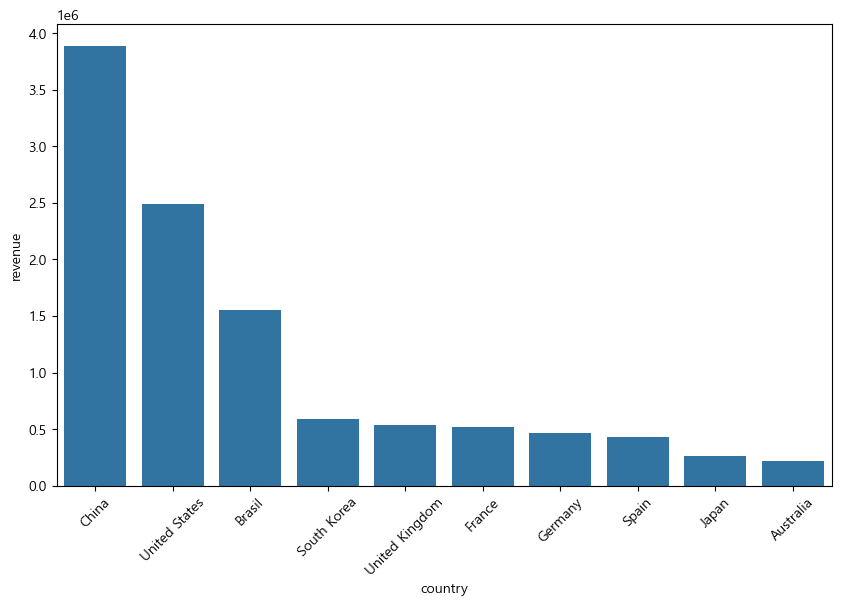

In [ ]:
top_10_countries = country_revenue.head(10)

plt.figure(figsize= (10,6))
sns.barplot(x = 'country', y = 'revenue', data = top_10_countries)
plt.xticks(rotation = 45)
plt.show()

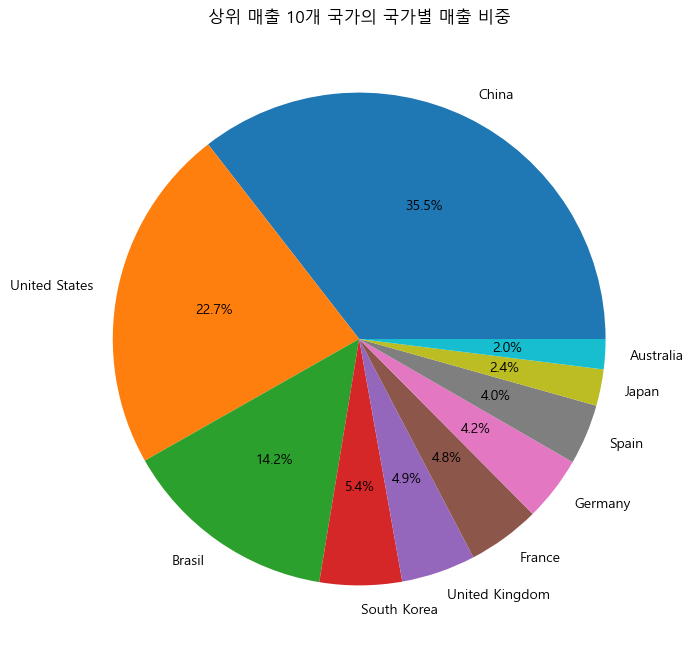

In [ ]:
plt.figure(figsize= (10,8))
plt.pie(top_10_countries['revenue'], labels = top_10_countries['country'], autopct = '%1.1f%%')
plt.title('상위 매출 10개 국가의 국가별 매출 비중')
plt.show()

#### 기간 별로 매출 변화 양상

In [ ]:
complete_orders['year_month'] = complete_orders['created_at_order'].dt.to_period('M')

C:\Users\hyunj\AppData\Local\Temp\ipykernel_10720\3211494405.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  complete_orders['year_month'] = complete_orders['created_at_order'].dt.to_period('M')


In [ ]:
complete_orders

,id_order_product,order_id,user_id_item,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,gender_orders,created_at_order,num_of_item,cost_all,category,name,brand,department,sku,distribution_center_id,created_at_orders,first_name,last_name,email,age,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user,product_cost,total_revenue,profit,year_month
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,F,2023-03-14 03:59:00+00:00,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2023-06-05 15:24:00+00:00,Terri,Alvarez,terrialvarez@example.net,35,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00,0.008300,0.02,0.011700,2023-03
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,F,2023-12-03 13:23:00+00:00,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-04-12 14:36:00+00:00,Rebecca,Mcgee,rebeccamcgee@example.org,49,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00,0.033200,0.08,0.046800,2023-12
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,F,2023-12-23 00:17:00+00:00,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-01-24 05:47:00+00:00,Shelly,Rogers,shellyrogers@example.net,44,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00,0.033200,0.08,0.046800,2023-12
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,F,2022-06-17 17:21:00+00:00,3,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-09-13 16:58:00+00:00,Mariah,Stephens,mariahstephens@example.com,59,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00,0.024900,0.06,0.035100,2022-06
5,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,F,2023-09-15 12:39:00+00:00,2,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-01-06 14:25:00+00:00,Danielle,Bennett,daniellebennett@example.com,46,Maryland,4809 Michael Stream Apt. 104,20879,Montgomery Village,United States,39.170423,-77.175666,Search,2019-08-22 12:39:00+00:00,0.016600,0.04,0.023400,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177346,41201,28344,22656,23546,111165,Complete,2023-06-17 15:30:18+00:00,2023-06-18 09:20:00+00:00,2023-06-19 07:29:00+00:00,NaT,999.00,M,2023-06-17 18:14:00+00:00,1,482.516999,Shorts,Alpha Industries Rip Stop Short,Alpha Industries,Men,C1AA157F9E8516370E3345F226EF62FC,5,2022-04-14 01:20:00+00:00,Michael,Kim,michaelkim@example.net,43,Shanxi,73274 Kelley Inlet,45012,Jingdezhen,China,37.851085,113.476525,Search,2023-03-15 18:14:00+00:00,482.516999,999.00,516.483001,2023-06
177350,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,M,2022-01-10 03:11:00+00:00,3,404.595001,Outerwear & Coats,Darla,Alpha Industries,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5,2023-09-16 00:38:00+00:00,Adam,Vasquez,adamvasquez@example.net,55,Seoul,77740 Linda Drive Apt. 783,156-090,Seoul,South Korea,37.485807,126.972360,Display,2019-12-10 03:11:00+00:00,1213.785004,2997.00,1783.214996,2022-01
177351,62986,43364,34691,23546,169937,Shipped,2023-02-26 0

In [ ]:
month_summary = complete_orders.groupby(['year_month', 'country']).agg(
    quantity = ('num_of_item', 'sum'),
    cost = ('product_cost', 'sum'),
    revenue = ('total_revenue', 'sum'),
    profit = ('profit', 'sum')

).reset_index().sort_values(['country','year_month'])

In [ ]:
month_summary

,year_month,country,quantity,cost,revenue,profit
6,2019-02,Australia,1,27.191500,59.500000,32.308500
23,2019-04,Australia,1,62.379199,149.949997,87.570798
33,2019-05,Australia,6,140.557680,305.959999,165.402319
44,2019-06,Australia,4,44.508342,83.300003,38.791661
53,2019-07,Australia,7,119.547110,260.850000,141.302890
...,...,...,...,...,...,...
663,2023-09,United States,1741,52109.213543,107224.090121,55114.876578
677,2023-10,United States,2187,63794.976153,133316.649995,69521.673843
690,2023-11,United States,2093,56916.094795,117315.350152,60399.255357
703,2023-12,United States,2623,72778.555916,149489.960257,76711.404341


In [ ]:
complete_orders.head()

,id_order_product,order_id,user_id_item,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,gender_orders,created_at_order,num_of_item,cost_all,category,name,brand,department,sku,distribution_center_id,created_at_orders,first_name,last_name,email,age,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user,product_cost,total_revenue,profit,year_month
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,F,2023-03-14 03:59:00+00:00,1,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2023-06-05 15:24:00+00:00,Terri,Alvarez,terrialvarez@example.net,35,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00,0.0083,0.02,0.0117,2023-03
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,F,2023-12-03 13:23:00+00:00,4,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-04-12 14:36:00+00:00,Rebecca,Mcgee,rebeccamcgee@example.org,49,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00,0.0332,0.08,0.0468,2023-12
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,F,2023-12-23 00:17:00+00:00,4,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2020-01-24 05:47:00+00:00,Shelly,Rogers,shellyrogers@example.net,44,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00,0.0332,0.08,0.0468,2023-12
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,F,2022-06-17 17:21:00+00:00,3,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-09-13 16:58:00+00:00,Mariah,Stephens,mariahstephens@example.com,59,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00,0.0249,0.06,0.0351,2022-06
5,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,F,2023-09-15 12:39:00+00:00,2,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,2022-01-06 14:25:00+00:00,Danielle,Bennett,daniellebennett@example.com,46,Maryland,4809 Michael Stream Apt. 104,20879,Montgomery Village,United States,39.170423,-77.175666,Search,2019-08-22 12:39:00+00:00,0.0166,0.04,0.0234,2023-09


<Figure size 2000x800 with 0 Axes>

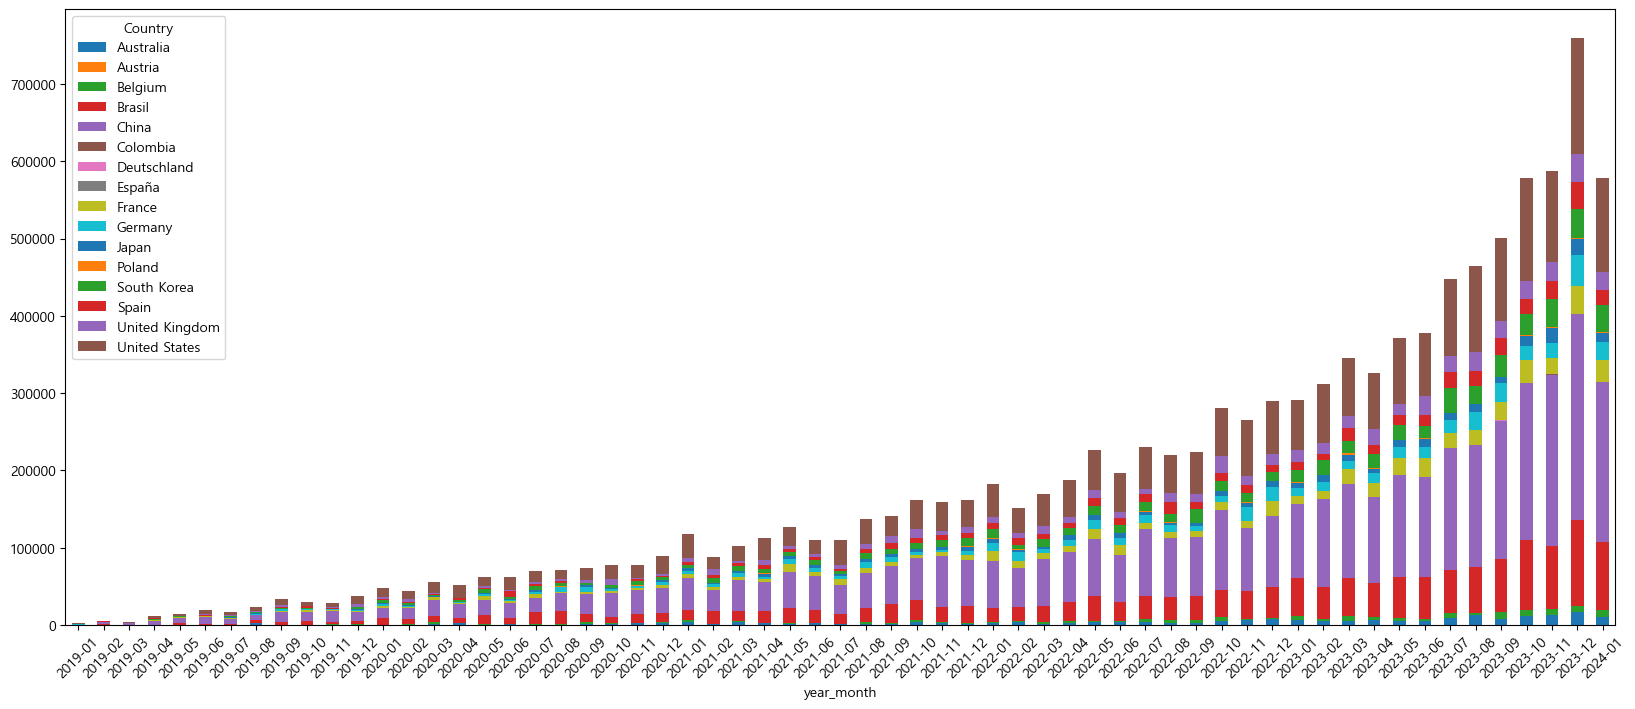

In [ ]:
time_data = complete_orders[['year_month', 'total_revenue', 'country']]
time_data_grouped = time_data.groupby(['year_month', 'country'])['total_revenue'].sum().unstack().fillna(0)


plt.figure(figsize = (20,8))
time_data_grouped.plot(kind = 'bar', stacked = True, figsize = (20,8))
plt.xticks(rotation = 45)
plt.legend(title = 'Country')

plt.show()

### 환불된 주문

In [ ]:
returned_orders = orders_final[orders_final['status_item'] == 'Returned'].copy()

In [ ]:
orders_final['status_item'].value_counts(normalize = True) * 100

status_item
Shipped       29.953652
Complete      25.092189
Processing    20.005187
Cancelled     14.921569
Returned      10.027403
Name: proportion, dtype: float64

In [ ]:
#단순 환불 횟수
returned_orders['brand'].value_counts().reset_index()

,brand,count
0,Allegra K,619
1,Calvin Klein,333
2,Carhartt,211
3,Volcom,194
4,Nautica,187
...,...,...
2018,Fame Fabrics,1
2019,Creekwood,1
2020,C.C. World,1
2021,BANDOLINOBLU,1


In [ ]:
#환불된 아이템 개수
returned_orders.groupby('brand')['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False).head(10)

,brand,num_of_item
73,Allegra K,1130
335,Calvin Klein,617
350,Carhartt,409
1897,Volcom,365
1268,Nautica,360
796,Hanes,344
1426,Quiksilver,315
851,Hurley,302
1787,Tommy Hilfiger,289
525,Diesel,285


In [ ]:
orders_final[orders_final['brand'] == 'Allegra K'].groupby('status_item').count()

,id_order_product,order_id,user_id_item,product_id_all,inventory_item_id,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,gender_orders,created_at_order,num_of_item,cost_all,category,name,brand,department,sku,distribution_center_id,created_at_orders,first_name,last_name,email,age,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user
status_item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cancelled,914,914,914,914,914,914,0,0,0,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914,905,914,914,914,914,914
Complete,1562,1562,1562,1562,1562,1562,1562,1562,0,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,1554,1562,1562,1562,1562,1562
Processing,1232,1232,1232,1232,1232,1232,0,0,0,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1217,1232,1232,1232,1232,1232
Returned,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,619,609,619,619,619,619,619
Shipped,1815,1815,1815,1815,1815,1815,1815,0,0,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815,1792,1815,1815,1815,1815,1815


In [ ]:
returned_orders.groupby('category')['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False)

,category,num_of_item
6,Intimates,2519
5,Fashion Hoodies & Sweatshirts,2225
7,Jeans,2224
24,Tops & Tees,2183
23,Swim,2121
22,Sweaters,2103
15,Shorts,2103
17,Sleep & Lounge,1988
0,Accessories,1763
11,Outerwear & Coats,1739


In [ ]:
# 국가별로 환불이 크게 이루어진게 있는지 확인
top_10_refund = returned_orders.groupby('country')['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False).head(10)

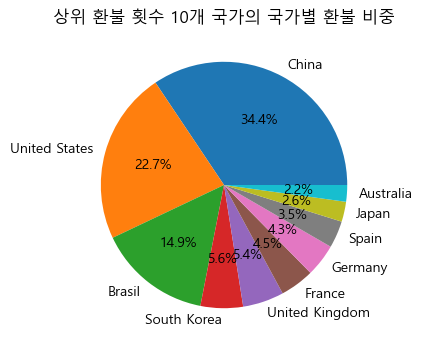

In [ ]:
plt.figure(figsize= (8,4))
plt.pie(top_10_refund['num_of_item'], labels = top_10_countries['country'], autopct = '%1.1f%%')
plt.title('상위 환불 횟수 10개 국가의 국가별 환불 비중')
plt.show()

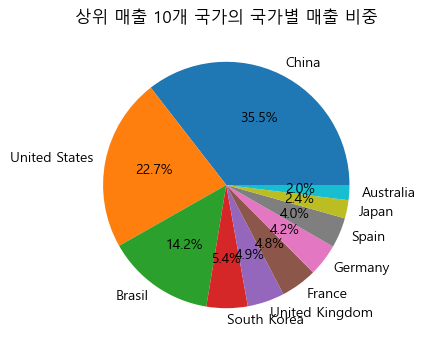

In [ ]:
plt.figure(figsize= (8,4))
plt.pie(top_10_countries['revenue'], labels = top_10_countries['country'], autopct = '%1.1f%%')
plt.title('상위 매출 10개 국가의 국가별 매출 비중')
plt.show()

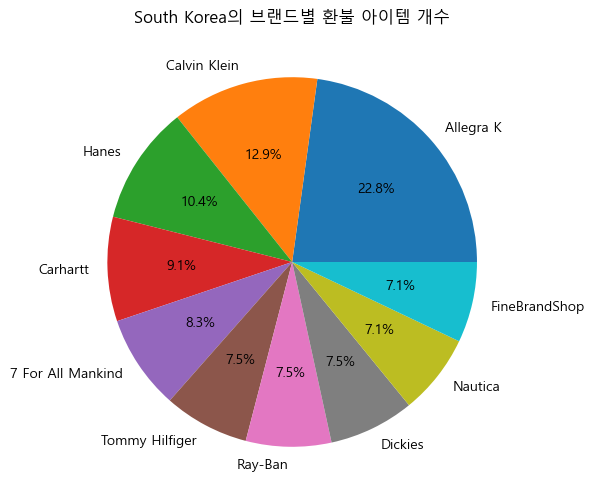

In [ ]:
# 국가 별 환불 브랜드 비중
country = 'South Korea'
returned_by_country = returned_orders.groupby(['country', 'brand'])['num_of_item'].sum().reset_index().sort_values(by = 'num_of_item', ascending = False)

returend_by_one_country = returned_by_country[returned_by_country['country'] == country].sort_values(by = 'num_of_item', ascending = False).head(10)

#파이 차트로 시각화
plt.figure(figsize= (12,6))
plt.pie(returend_by_one_country['num_of_item'], labels = returend_by_one_country['brand'], autopct = '%1.1f%%')
plt.title(f'{country}의 브랜드별 환불 아이템 개수')
plt.show()

### 이벤트 테이블

In [ ]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


In [ ]:
events.isna().sum()

id                       0
user_id            1125671
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23080
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [ ]:
events['created_at'] =  pd.to_datetime(events['created_at'], errors = 'coerce')

In [ ]:
events.describe()
#id는 쓸모없는 정보

,id,user_id,sequence_number
count,2.431963e+06,1.306292e+06,2.431963e+06
mean,1.215982e+06,4.996636e+04,3.316146e+00
std,7.020474e+05,2.881711e+04,2.676365e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.079915e+05,2.500500e+04,1.000000e+00
50%,1.215982e+06,4.992700e+04,2.000000e+00
75%,1.823972e+06,7.483900e+04,4.000000e+00
max,2.431963e+06,1.000000e+05,1.300000e+01


#### 이벤트 타입 살펴보기

In [ ]:
events['event_type'].value_counts().reset_index()

,event_type,count
0,product,845607
1,cart,595994
2,department,595323
3,purchase,181759
4,cancel,125568
5,home,87712


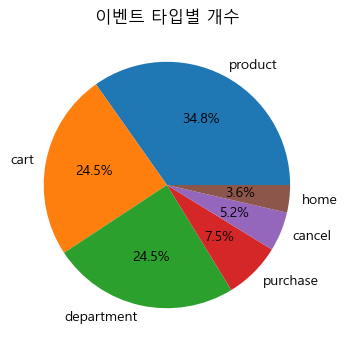

In [ ]:
plt.figure(figsize= (8,4))
plt.pie(events['event_type'].value_counts().reset_index()['count']
        , labels = events['event_type'].value_counts().reset_index()['event_type'], autopct = '%1.1f%%')
plt.title('이벤트 타입별 개수')
plt.show()

In [ ]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [ ]:
#traffic_source별 이벤트 타입 -> 전환율 파악

events_source = events[['traffic_source', 'event_type']]

In [ ]:
events_source = events_source.groupby(['traffic_source', 'event_type']).size().reset_index(name = 'count')
# size는 null값을 포함, count는 포함하지 않습니다.

In [ ]:
pivot_table = events_source.pivot_table(index = 'traffic_source', columns = 'event_type', values = 'count', fill_value = 0)
pivot_table['total_events'] = pivot_table.sum(axis= 1) # 행 방향으로 합침
pivot_table['conversion_rate'] = pivot_table['purchase'] * 100/pivot_table['total_events']


In [ ]:
pivot_table.head()

event_type,cancel,cart,department,home,product,purchase,total_events,conversion_rate
traffic_source,,,,,,,,
Adwords,37795.0,179281.0,178886.0,26350.0,254290.0,54542.0,731144.0,7.459816
Email,56170.0,267411.0,267470.0,39495.0,379736.0,81706.0,1091988.0,7.482317
Facebook,12669.0,59962.0,59581.0,8794.0,84523.0,18305.0,243834.0,7.507157
Organic,6284.0,29822.0,29930.0,4379.0,42520.0,9124.0,122059.0,7.475074
YouTube,12650.0,59518.0,59456.0,8694.0,84538.0,18082.0,242938.0,7.443051


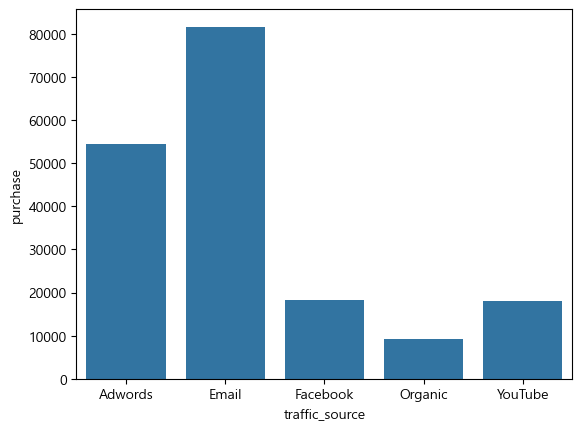

In [ ]:
sns.barplot(x = 'traffic_source', y = 'purchase', data = pivot_table)
plt.show()

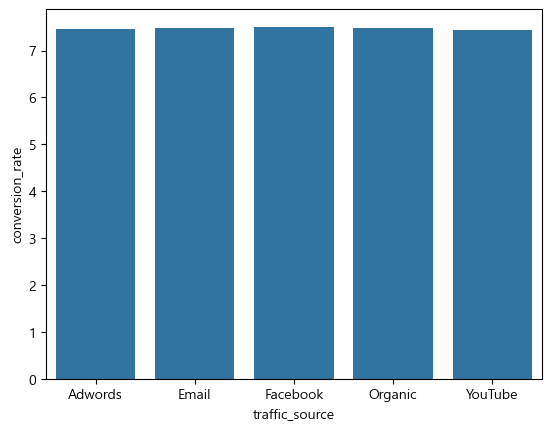

In [ ]:
sns.barplot(x = 'traffic_source', y = 'conversion_rate', data = pivot_table)
plt.show()